<a href="https://colab.research.google.com/github/varunkr24/Capstone-Project/blob/Python/Capstone_Project_CV2_Group_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - CV2 (Group 2)
## Object Detcction - CAR
### DOMAIN: Automotive. Surveillance.
#### CONTEXT:
Computer vision can be used to automate supervision and generate action appropriate action trigger if the event is predicted from the image of interest. For example a car moving on the road can be easily identified by a camera as make of the car, type, colour, number plates etc.
#### DATA DESCRIPTION:
The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe.
#### Data description:
‣ Train Images: Consists of real images of cars as per the make and year of the car.
‣ Test Images: Consists of real images of cars as per the make and year of the car.
‣ Train Annotation: Consists of bounding box region for training images.
‣ Test Annotation: Consists of bounding box region for testing images.
Dataset has been attached along with this project. Please use the same for this capstone project.
Dataset: https://drive.google.com/drive/folders/1y6JWx2CpsOuka00uePe72jNgr7F9sK45?usp=sharing
Original dataset link for your reference only: https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder
Reference: 3D Object Representations for Fine-Grained Categorisation, Jonathan Krause, Michael Stark, Jia Deng, Li Fei-Fei 4th IEEE Workshop on 3D Representation and Recognition, at ICCV 2013 (3dRR-13). Sydney, Australia. Dec. 8, 2013.
#### PROJECT OBJECTIVE: 
Design a DL based car identification model.

# Milestone 1

##Step 1: Import the data

###Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from skimage.transform import resize
from skimage.io import imread
import random
from os import path
from google.colab import drive
import cv2
import random

### Mount drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### Set data path

In [ ]:
DATA_SET_PATH = "/content/drive/MyDrive/Dataset/"
ANNOTATION_PATH = DATA_SET_PATH + "Annotations/"
TRAIN_IMAGES_DIR_PATH = DATA_SET_PATH + "Car Images/Train Images/"
TEST_IMAGES_DIR_PATH = DATA_SET_PATH + "Car Images/Test Images/"

In [ ]:
"""
DATA_SET_PATH = "/content/drive/MyDrive/Great Learning/Cap/Dataset/"
ANNOTATION_PATH = DATA_SET_PATH + "Annotations/"
TRAIN_IMAGES_DIR_PATH = DATA_SET_PATH + "Car Images/Train Images/"
TEST_IMAGES_DIR_PATH = DATA_SET_PATH + "Car Images/Test Images/"
"""

'\nDATA_SET_PATH = "/content/drive/MyDrive/Great Learning/Cap/Dataset/"\nANNOTATION_PATH = DATA_SET_PATH + "Annotations/"\nTRAIN_IMAGES_DIR_PATH = DATA_SET_PATH + "Car Images/Train Images/"\nTEST_IMAGES_DIR_PATH = DATA_SET_PATH + "Car Images/Test Images/"\n'

###Load *Car names and make* data

In [ ]:
car_makes_df = pd.read_csv(DATA_SET_PATH + "Car names and make.csv", header=None, names=["car_make"]) 

In [ ]:
car_makes_df

car_make
0          AM General Hummer SUV 2000
1                 Acura RL Sedan 2012
2                 Acura TL Sedan 2012
3                Acura TL Type-S 2008
4                Acura TSX Sedan 2012
..                                ...
191  Volkswagen Beetle Hatchback 2012
192          Volvo C30 Hatchback 2012
193              Volvo 240 Sedan 1993
194               Volvo XC90 SUV 2007
195     smart fortwo Convertible 2012

[196 rows x 1 columns]

In [ ]:
car_makes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_make  196 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


- There are no nulls
- There are 196 car models

###Load Annotations Data

In [ ]:
car_annotations_train = pd.read_csv(ANNOTATION_PATH + "Train Annotations.csv")
car_annotations_test = pd.read_csv(ANNOTATION_PATH + "Test Annotation.csv")

In [ ]:
car_annotations_train

Image Name  Bounding Box coordinates  ...  Unnamed: 4  Image class
0     00001.jpg                        39  ...         375           14
1     00002.jpg                        36  ...         587            3
2     00003.jpg                        85  ...         381           91
3     00004.jpg                       621  ...        1096          134
4     00005.jpg                        14  ...          99          106
...         ...                       ...  ...         ...          ...
8139  08140.jpg                         3  ...         336           78
8140  08141.jpg                       138  ...         523          196
8141  08142.jpg                        26  ...         449          163
8142  08143.jpg                        78  ...         908          112
8143  08144.jpg                        20  ...         677           17

[8144 rows x 6 columns]

In [ ]:
car_annotations_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Image Name                8144 non-null   object
 1   Bounding Box coordinates  8144 non-null   int64 
 2   Unnamed: 2                8144 non-null   int64 
 3   Unnamed: 3                8144 non-null   int64 
 4   Unnamed: 4                8144 non-null   int64 
 5   Image class               8144 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 381.9+ KB


car_annotations_train data has 6 features with no null/missing value.    
Bounding Box coordinates, Unnamed: 2, Unnamed: 3, Unnamed: 4 are x1, y1, x2, y2 coordinates respectively  

In [ ]:
car_annotations_test

Image Name  Bounding Box coordinates  ...  Unnamed: 4  Image class
0     00001.jpg                        30  ...         147          181
1     00002.jpg                       100  ...         203          103
2     00003.jpg                        51  ...         659          145
3     00004.jpg                        67  ...         407          187
4     00005.jpg                       140  ...         339          185
...         ...                       ...  ...         ...          ...
8036  08037.jpg                        49  ...         669           63
8037  08038.jpg                        23  ...         459           16
8038  08039.jpg                        33  ...         252           17
8039  08040.jpg                        33  ...         376           38
8040  08041.jpg                        77  ...         380           32

[8041 rows x 6 columns]

In [ ]:
car_annotations_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Image Name                8041 non-null   object
 1   Bounding Box coordinates  8041 non-null   int64 
 2   Unnamed: 2                8041 non-null   int64 
 3   Unnamed: 3                8041 non-null   int64 
 4   Unnamed: 4                8041 non-null   int64 
 5   Image class               8041 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 377.0+ KB


car_annotations_test data has 6 features with no null/missing value.    
Bounding Box coordinates, Unnamed: 2, Unnamed: 3, Unnamed: 4 are x1, y1, x2, y2 coordinates respectively  

### Display images class and respective number of images
##### Use pd.option_context to display maximum rows

In [ ]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
  print(pd.DataFrame(car_annotations_train['Image class']).value_counts())

Image class
119            68
79             49
161            48
167            48
56             47
144            47
162            46
171            46
112            46
95             46
182            46
98             46
194            46
191            46
43             46
20             46
53             45
24             45
6              45
147            45
8              45
123            45
121            45
115            45
114            45
34             45
59             45
109            45
107            45
82             45
81             45
153            45
73             45
72             45
65             45
44             45
148            45
1              45
165            45
179            45
108            44
188            44
170            44
172            44
173            44
105            44
94             44
31             44
89             44
87             44
132            44
85             44
177            44
76             44
75             4

Image class - 119 has maximum 68 images and Image class - 136 has minimum 24 images

####Visualize train images and test images datasets

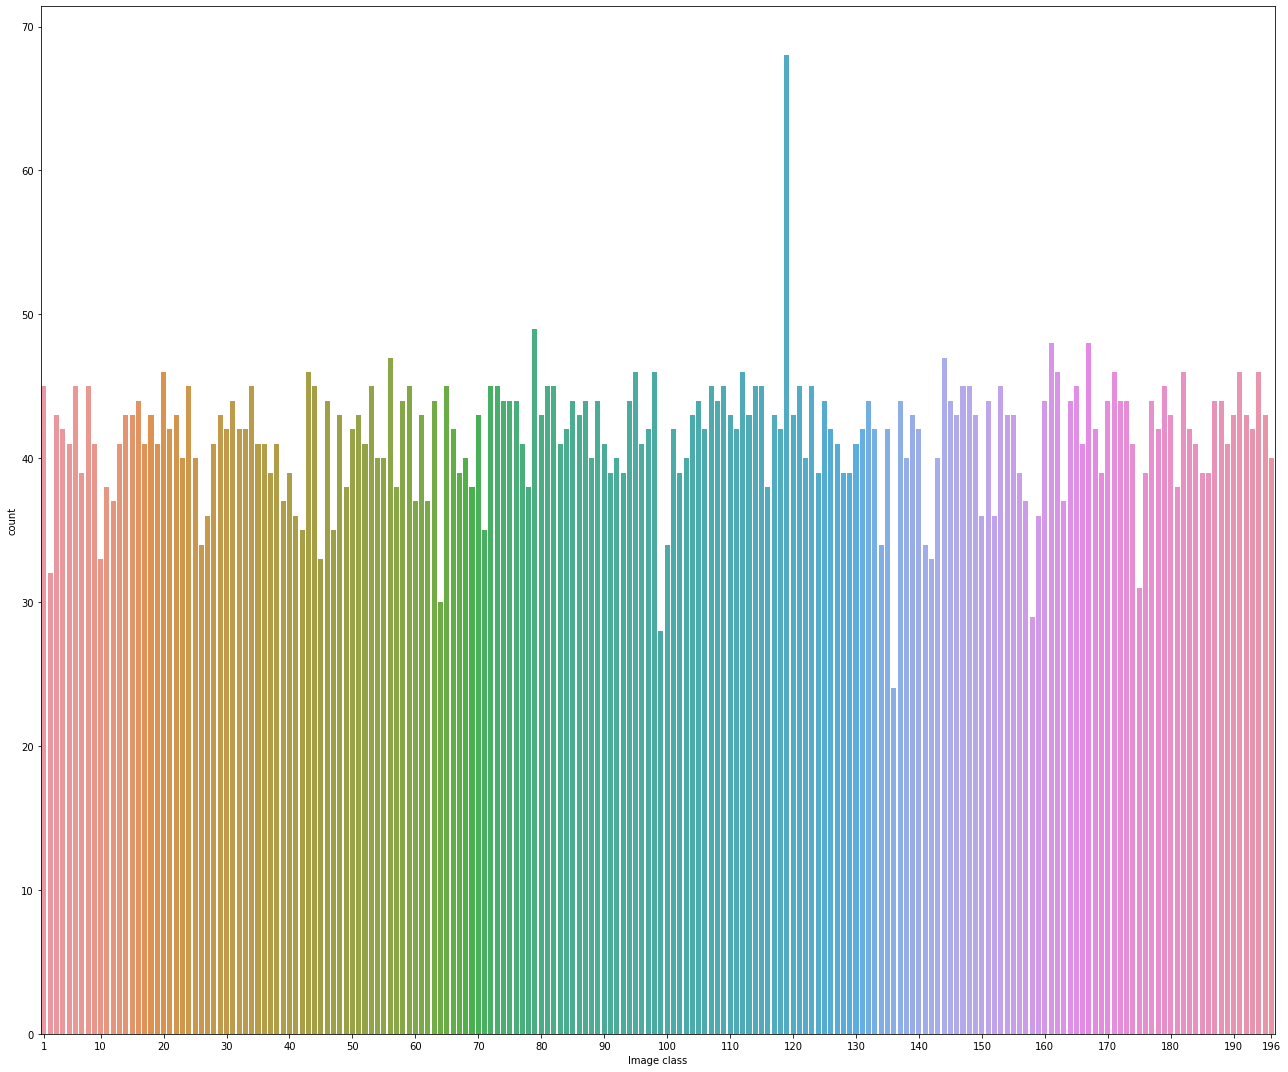

In [ ]:
#%matplotlib inline
plt.subplots(figsize=(18,15))
ax = sns.countplot(data = car_annotations_train, x = car_annotations_train['Image class'] )
ax.set_xticks([0, 9,19,29,39,49,59,69,79,89,99,109,119,129,139,149,159,169,179,189,195] )
ax.set_xticklabels([1, 10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,196])
plt.tight_layout()
plt.show()

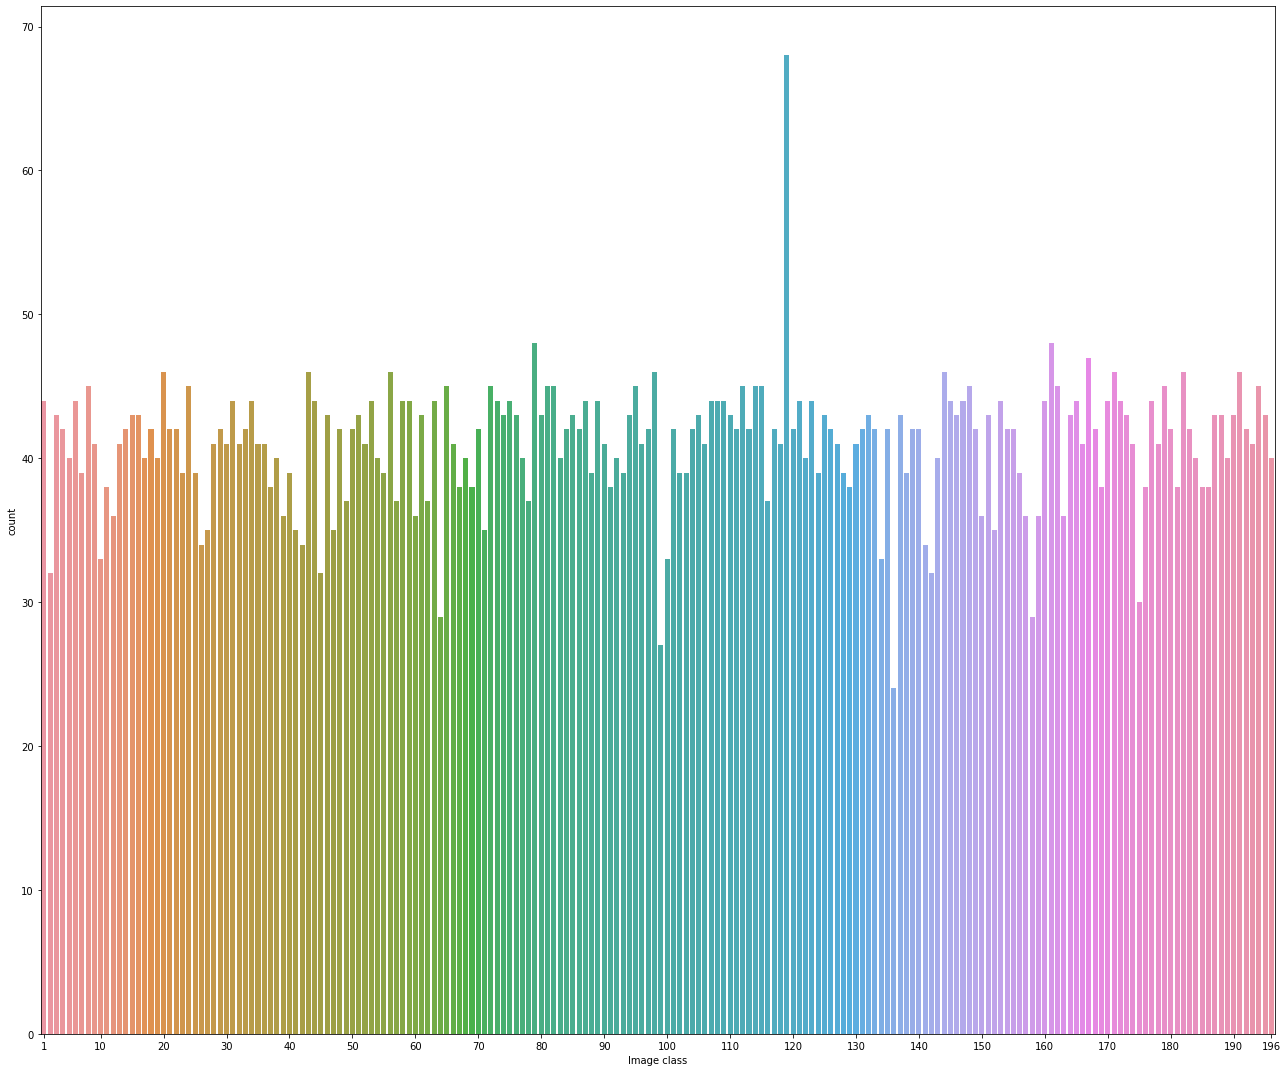

In [ ]:
plt.subplots(figsize=(18,15))
ax = sns.countplot(data = car_annotations_test, x = car_annotations_test['Image class'] )
ax.set_xticks([0, 9,19,29,39,49,59,69,79,89,99,109,119,129,139,149,159,169,179,189,195] )
ax.set_xticklabels([1, 10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,196])
plt.tight_layout()
plt.show()

In Test Images, Image class - 119 has maximum images and Image class - 136 has minimum images

##Step 2: Map training and testing images to its classes.

####Custom function to create dataframe that contains Image Name, Full path of the image and Image class

In [ ]:
def load_image_paths_and_map_class(car_makes, dir_path, df_annotations):
  data = []
  for car_make in car_makes:
    img_path =  dir_path + car_make
    if os.path.exists(img_path):
      for img in os.listdir(img_path):
        data.append([img, img_path + "/" +img, df_annotations[df_annotations["Image Name"]==img]["Image class"].values[0]])
  return pd.DataFrame(data, columns=["ImageName", "FullPath", "ImageClass"])

In [ ]:
train_images_path = load_image_paths_and_map_class(car_makes_df.car_make.values, TRAIN_IMAGES_DIR_PATH, car_annotations_train)
test_images_path = load_image_paths_and_map_class(car_makes_df.car_make.values, TEST_IMAGES_DIR_PATH, car_annotations_test)

Image Name, Image path and Image class are stored in train_images_path and test_images_path

In [ ]:
print("Total Training Images:", len(train_images_path))
print("Total Testing Images:", len(test_images_path))

Total Training Images: 8103
Total Testing Images: 8000


#### Display train_images_path dataframe

In [ ]:
train_images_path.head()

ImageName                                           FullPath  ImageClass
0  03008.jpg  /content/drive/MyDrive/Dataset/Car Images/Trai...           1
1  05030.jpg  /content/drive/MyDrive/Dataset/Car Images/Trai...           1
2  02848.jpg  /content/drive/MyDrive/Dataset/Car Images/Trai...           1
3  01832.jpg  /content/drive/MyDrive/Dataset/Car Images/Trai...           1
4  06159.jpg  /content/drive/MyDrive/Dataset/Car Images/Trai...           1

####Check image shape

In [ ]:
print("Image path:", train_images_path.iloc[0,1])
print("Image shape:", cv2.imread(train_images_path.iloc[0,1]).shape)

Image path: /content/drive/MyDrive/Dataset/Car Images/Train Images/AM General Hummer SUV 2000/03008.jpg
Image shape: (1536, 2048, 3)


In [ ]:
print("Image path:", train_images_path.iloc[1,1])
print("Image shape:", cv2.imread(train_images_path.iloc[1,1]).shape)

Image path: /content/drive/MyDrive/Dataset/Car Images/Train Images/AM General Hummer SUV 2000/05030.jpg
Image shape: (420, 640, 3)


In [ ]:
print("Image path:", train_images_path.iloc[2,1])
print("Image shape:", cv2.imread(train_images_path.iloc[2,1]).shape)

Image path: /content/drive/MyDrive/Dataset/Car Images/Train Images/AM General Hummer SUV 2000/02848.jpg
Image shape: (480, 640, 3)


It can be noted that shape/resolution of images are not identical.

#### Custom function to display random images along with respective class

In [ ]:
def plot_random_cars(car_makes, images_path):
  for car_make_idx in range(5):
      imageClass = random.randrange(0, len(car_makes_df))
      print(car_makes.iloc[imageClass].values[0])
      plt.figure(figsize=(15,12))
      for i in range(5):
        df = images_path[images_path["ImageClass"]==imageClass]
        if len(df) > 0:
          idx = random.randrange(0, len(df))
          plt.subplot(5, 5, i+1)
          plt.xticks([])
          plt.yticks([])
          plt.grid(False)
          plt.imshow(imread(df.iloc[idx].FullPath))
      plt.show()

####Display train images along with its class

Audi S5 Coupe 2012


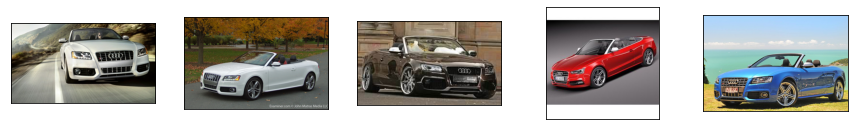

Chevrolet Traverse SUV 2012


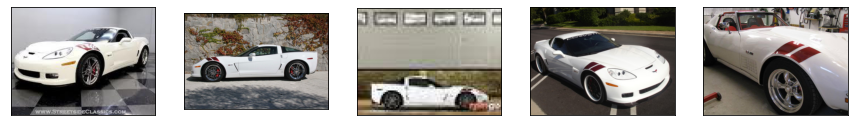

Chrysler Town and Country Minivan 2012


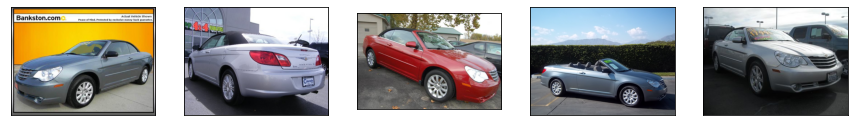

BMW M5 Sedan 2010


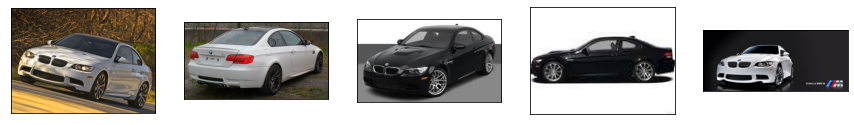

Acura ZDX Hatchback 2012


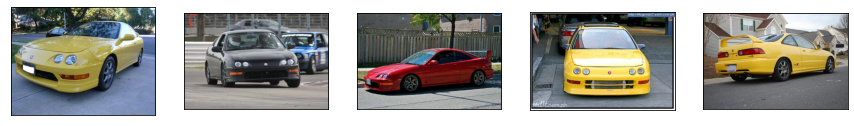

In [ ]:
plot_random_cars(car_makes_df, train_images_path)

####Display Test images along with its class

Hyundai Sonata Sedan 2012


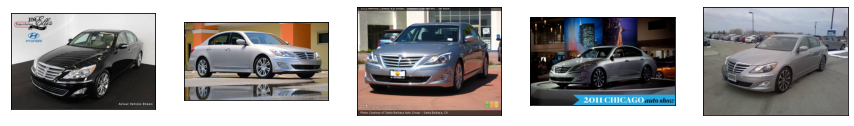

Tesla Model S Sedan 2012


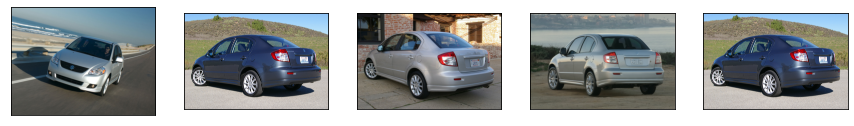

Volkswagen Golf Hatchback 2012


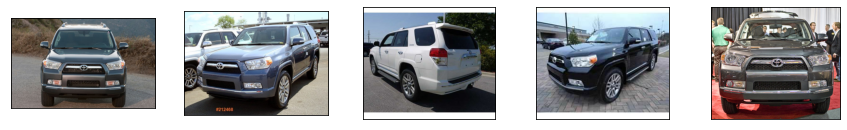

Land Rover LR2 SUV 2012


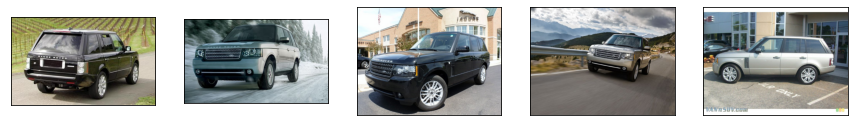

Volkswagen Beetle Hatchback 2012


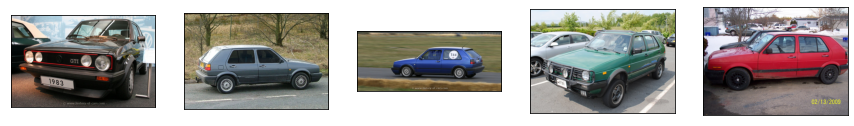

In [ ]:
plot_random_cars(car_makes_df, test_images_path)

##Step 3: Map training and testing images to its annotations. 


####Custom function to map images to its annotations

In [ ]:
def plot_random_cars_with_bounding_box(car_makes, images_path, annotations):
  for car_make_idx in range(5):
      imageClass = random.randrange(0, len(car_makes_df))
      print(car_makes.iloc[imageClass].values[0])
      plt.figure(figsize=(15,12))
      for i in range(3):
        df = images_path[images_path["ImageClass"]==imageClass]
        if len(df) > 0:
          idx = random.randrange(0, len(df))
          plt.subplot(3, 3, i+1)
          plt.xticks([])
          plt.yticks([])
          plt.grid(False)
          img = imread(df.iloc[idx].FullPath)
          ann = annotations[annotations["Image Name"] == df.iloc[idx].ImageName]
          x1,y1,x2,y2 = ann['Bounding Box coordinates'].values[0], ann['Unnamed: 2'].values[0], ann['Unnamed: 3'].values[0], ann['Unnamed: 4'].values[0]
          cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2) # add rectangle to image
          plt.imshow(img)
      plt.show()

##Step 4: Display images with bounding box

####Draw bounding box on Train Images

Honda Accord Sedan 2012


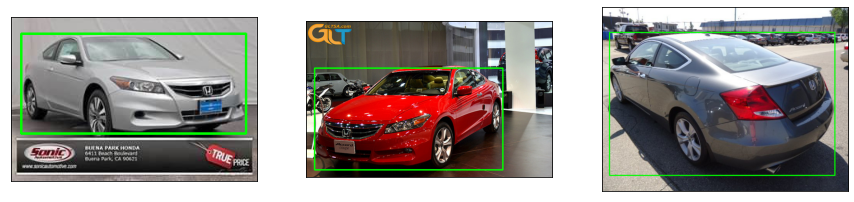

Ford Expedition EL SUV 2009


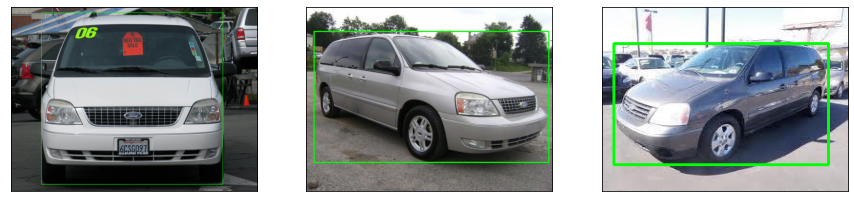

Chrysler Town and Country Minivan 2012


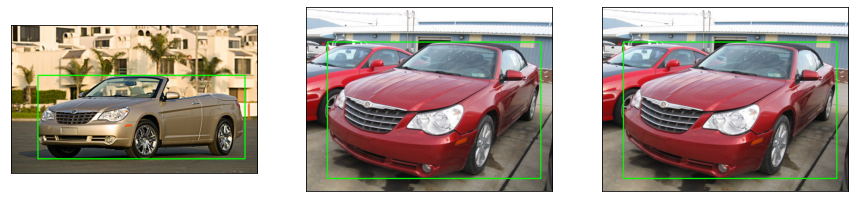

Chevrolet Avalanche Crew Cab 2012


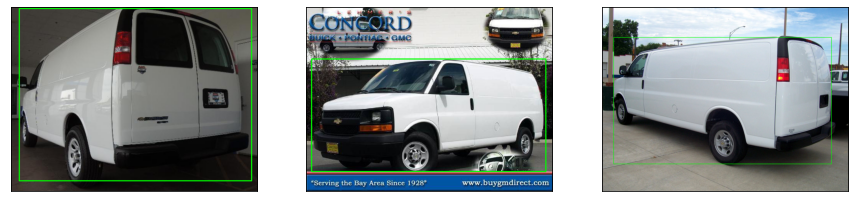

Nissan 240SX Coupe 1998


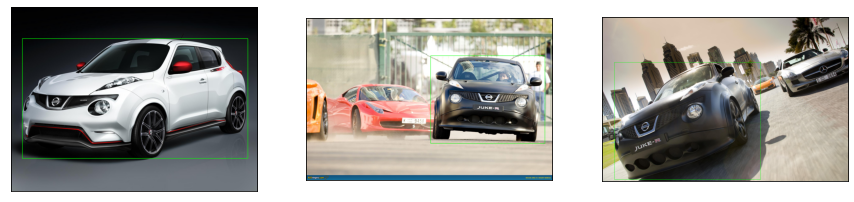

In [ ]:
plot_random_cars_with_bounding_box(car_makes_df, train_images_path, car_annotations_train)

####Draw Bounding Box on Test Images

Porsche Panamera Sedan 2012


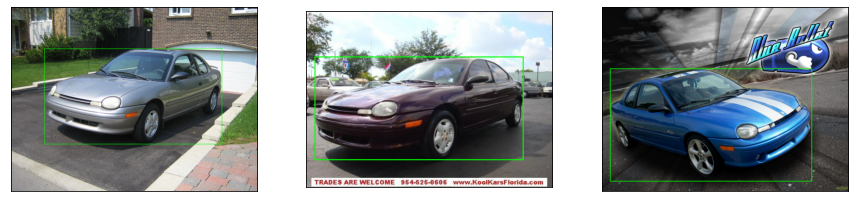

Audi R8 Coupe 2012


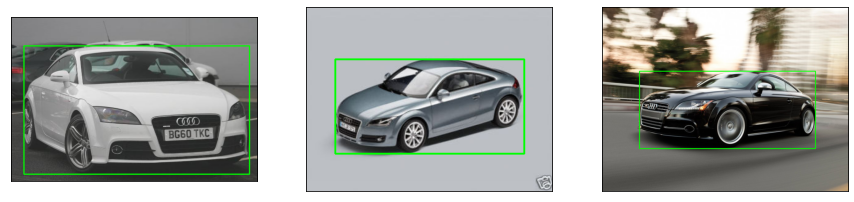

Ford F-450 Super Duty Crew Cab 2012


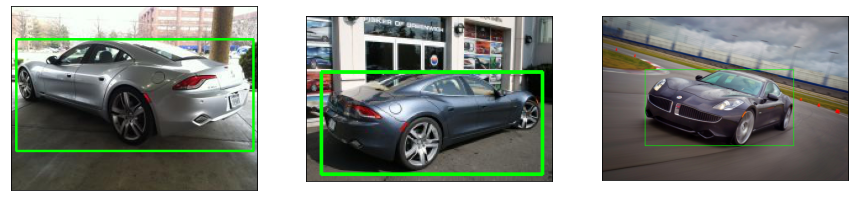

Ford Freestar Minivan 2007


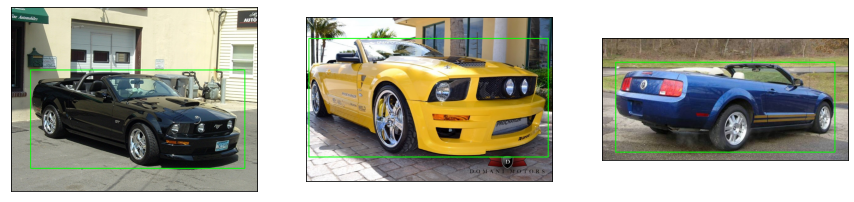

Infiniti QX56 SUV 2011


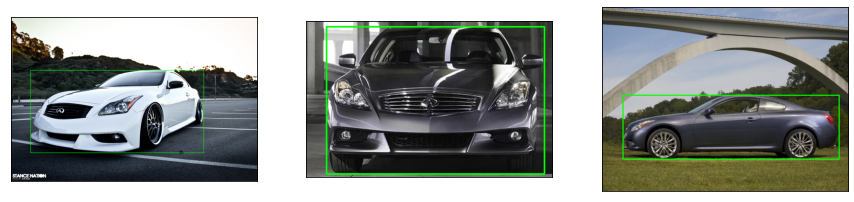

In [ ]:
plot_random_cars_with_bounding_box(car_makes_df, test_images_path,car_annotations_test)

#### Output: 
Images mapped to its class and annotation ready to be used for deep learning

#Milestone 2

## Classification Model

#### Import libraries & define parameters

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout

Image_Size = 224
Batch_Size = 32
Epochs = 10

#### Define Callbacks

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, ModelCheckpoint

#model checkpoint to save the model after every epoch
SavePath = "models/ResNetModel_weights.{epoch:02d}.hdf5"
model_checkpoint = ModelCheckpoint(
    filepath=SavePath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='auto')

lr_schedule = LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch/2)) # change learning rate from 1e-8 to 1e-3

Redlr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=5, verbose=0,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.00001)

In [ ]:
os.chdir('/content/drive/MyDrive/Great Learning/Cap')

In [ ]:
os.chdir('/content/drive/MyDrive/Datasetcopy') ## created by varun

### Data Generator w/o Augmentation

Load the image during training using flow from directory function

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(TRAIN_IMAGES_DIR_PATH, target_size = (Image_Size, Image_Size), batch_size=Batch_Size, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(TEST_IMAGES_DIR_PATH, target_size = (Image_Size, Image_Size), batch_size=Batch_Size, class_mode='categorical')


Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [ ]:
#varun
DATA_SET_PATH_varun = "/content/drive/MyDrive/Datasetcopy/"
#ANNOTATION_PATH_varun = DATA_SET_PATH_varun + "Annotations/"
TRAIN_IMAGES_DIR_PATH_varun = DATA_SET_PATH_varun + "Car Images/Train Images/"
TEST_IMAGES_DIR_PATH_varun = DATA_SET_PATH_varun + "Car Images/Test Images/"

In [ ]:
##varun
train_datagen_varun = ImageDataGenerator(rescale=1.0/255,
                                         shear_range=0.2,
                                         zoom_range=0.5,
                                         horizontal_flip=True,
                                         brightness_range=[0.2,0.8],
                                         width_shift_range=0.2,
                                         rotation_range=5)
test_datagen_varun = ImageDataGenerator(rescale=1.0/255)

train_generator_varun = train_datagen_varun.flow_from_directory(TRAIN_IMAGES_DIR_PATH_varun, target_size = (224, 224), batch_size=Batch_Size, class_mode='categorical')
test_generator_varun = test_datagen_varun.flow_from_directory(TEST_IMAGES_DIR_PATH_varun, target_size = (224, 224), batch_size=Batch_Size, class_mode='categorical')


Found 162 images belonging to 4 classes.
Found 161 images belonging to 4 classes.


### MobileNet Model

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet

base_model = MobileNet(input_shape=(Image_Size, Image_Size, 3), include_top=False)

#Freeze all the layers
for layer in base_model.layers:
        layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x) #average pooling of the last feature extractor layer 
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(196, activation='softmax')(x) #Dense layer for 196 output class

model = Model(inputs=base_model.input, outputs=x)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=10, validation_data=test_generator, validation_steps=len(test_generator))

Epoch 1/10
254/254 [==============================] - 3412s 13s/step - loss: 4.5092 - accuracy: 0.0584 - val_loss: 3.6206 - val_accuracy: 0.1428
Epoch 2/10
254/254 [==============================] - 944s 4s/step - loss: 2.9725 - accuracy: 0.2479 - val_loss: 2.7807 - val_accuracy: 0.2763
Epoch 3/10
254/254 [==============================] - 680s 3s/step - loss: 2.1104 - accuracy: 0.4286 - val_loss: 2.3550 - val_accuracy: 0.3713
Epoch 4/10
254/254 [==============================] - 580s 2s/step - loss: 1.5612 - accuracy: 0.5535 - val_loss: 2.1667 - val_accuracy: 0.4219
Epoch 5/10
254/254 [==============================] - 539s 2s/step - loss: 1.1666 - accuracy: 0.6637 - val_loss: 2.0763 - val_accuracy: 0.4519
Epoch 6/10
254/254 [==============================] - 491s 2s/step - loss: 0.8344 - accuracy: 0.7523 - val_loss: 2.2353 - val_accuracy: 0.4447
Epoch 7/10
254/254 [==============================] - 484s 2s/step - loss: 0.6126 - accuracy: 0.8182 - val_loss: 2.2671 - val_accuracy: 0.45

Training accuracy of 95% and test accuracy of 47% is achieved.

The model is overfitting on the training data

In [ ]:
####varun

from tensorflow.keras.applications.mobilenet import MobileNet


base_model = MobileNet(input_shape=(150, 150, 3), include_top=False) ##varun

#Freeze all the layers
for layer in base_model.layers:
        layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x) #average pooling of the last feature extractor layer 
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(4, activation='softmax')(x) #Dense layer for 4 output class

model = Model(inputs=base_model.input, outputs=x)

model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 75, 75, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 75, 75, 32)        0   

In [ ]:
##varun
import tensorflow as tf
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
##varun
model.fit(train_generator_varun, steps_per_epoch=len(train_generator_varun), epochs=20, validation_data=test_generator_varun, validation_steps=len(test_generator_varun))

Epoch 1/20
6/6 [==============================] - 30s 1s/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 2.1085 - val_accuracy: 0.6087
Epoch 2/20
6/6 [==============================] - 7s 1s/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 2.1542 - val_accuracy: 0.6087
Epoch 3/20
6/6 [==============================] - 7s 1s/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 2.1867 - val_accuracy: 0.6087
Epoch 4/20
6/6 [==============================] - 7s 1s/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 2.2060 - val_accuracy: 0.6087
Epoch 5/20
6/6 [==============================] - 7s 1s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 2.2160 - val_accuracy: 0.6025
Epoch 6/20
6/6 [==============================] - 7s 1s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 2.2229 - val_accuracy: 0.6025
Epoch 7/20
6/6 [==============================] - 7s 1s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 2.2246 - val_accuracy: 0.6025
Epoch 8/20
6/6 [========================

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
#model = EfficientNetB0(weights='imagenet')

In [ ]:
base_model = EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
#varun
DATA_SET_PATH_varun = "/content/drive/MyDrive/Datasetcopy/"
#ANNOTATION_PATH_varun = DATA_SET_PATH_varun + "Annotations/"
TRAIN_IMAGES_DIR_PATH_varun = DATA_SET_PATH_varun + "Car Images/Train Images/"
TEST_IMAGES_DIR_PATH_varun = DATA_SET_PATH_varun + "Car Images/Test Images/"


In [ ]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa

In [ ]:
import os
os.listdir(TRAIN_IMAGES_DIR_PATH_varun)

['Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura Integra Type R 2001']

In [ ]:
augmented_img = []
labels = []

for imgfolder in os.listdir(TRAIN_IMAGES_DIR_PATH_varun):
  imgpath = TRAIN_IMAGES_DIR_PATH_varun + imgfolder
  for img in os.listdir(imgpath):
    image = imageio.imread(imgpath + '/' +  img)
    resize_image = iaa.Resize(224)
    image = resize_image.augment_image(image)
    augmented_img.append(image)
    labels.append(imgfolder)
    rotate=iaa.Affine(rotate=(-50, 30))
    rotated_image=rotate.augment_image(image)
    augmented_img.append(rotated_image)
    labels.append(imgfolder)
    
    gaussian_noise=iaa.AdditiveGaussianNoise(10,20)
    noise_image=gaussian_noise.augment_image(image)
    augmented_img.append(noise_image)
    labels.append(imgfolder)
    
    crop = iaa.Crop(percent=(0, 0.3)) # crop image
    crop_image=crop.augment_image(image)
    augmented_img.append(crop_image)
    labels.append(imgfolder)

    shear = iaa.Affine(shear=(0,40))
    shear_image=shear.augment_image(image)
    augmented_img.append(shear_image)
    labels.append(imgfolder)

    #flipping image horizontally
    flip_hr=iaa.Fliplr(p=1.0)
    flip_hr_image= flip_hr.augment_image(image)
    augmented_img.append(flip_hr_image)
    labels.append(imgfolder)
    
    flip_vr=iaa.Flipud(p=1.0)
    flip_vr_image= flip_vr.augment_image(image)
    augmented_img.append(flip_vr_image)
    labels.append(imgfolder)
    
    contrast=iaa.GammaContrast(gamma=2.0)
    contrast_image =contrast.augment_image(image)
    augmented_img.append(contrast_image)
    labels.append(imgfolder)

    scale_im=iaa.Affine(scale={"x": (1.5, 1.0), "y": (1.5, 1.0)})
    scale_image =scale_im.augment_image(image)
    augmented_img.append(scale_image)
    labels.append(imgfolder)


In [ ]:
augmented_img_test = []
labels_test = []

for imgfolder in os.listdir(TEST_IMAGES_DIR_PATH_varun):
  imgpath = TEST_IMAGES_DIR_PATH_varun + imgfolder
  for img in os.listdir(imgpath):
    image = imageio.imread(imgpath + '/' +  img)
    resize_image = iaa.Resize(224)
    image = resize_image.augment_image(image)
    augmented_img_test.append(image)
    labels_test.append(imgfolder)

In [ ]:
augmented_img_test = np.array(augmented_img_test)
labels_test = np.array(labels_test)

augmented_img = np.array(augmented_img)
labels = np.array(labels)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(labels)
labels_enc = le.transform(labels)

le = LabelEncoder()

le.fit(labels_test)
labels_test_enc = le.transform(labels_test)

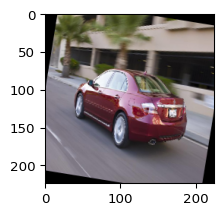

In [ ]:
ia.imshow(augmented_img[1])

In [ ]:
augmented_img[0].shape,augmented_img[24].shape, np.array(augmented_img).shape, len(labels)

((224, 224, 3), (224, 224, 3), (1458, 224, 224, 3), 1458)

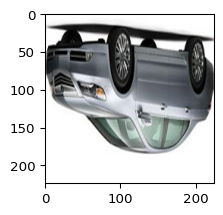

In [ ]:
ia.imshow(augmented_img[24])

In [ ]:
pd.DataFrame(labels_enc).value_counts()

0    405
2    387
3    378
1    288
dtype: int64

In [ ]:
#######################
np.save('X_train.npy', X_test)
np.save('y_test.npy', y_test)


np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)


In [ ]:
##########################################

X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')

y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [ ]:
##varun
train_datagen_varun = ImageDataGenerator(rescale=1.0/255)
test_datagen_varun = ImageDataGenerator(rescale=1.0/255)

train_generator_varun = train_datagen_varun.flow(augmented_img,labels_enc, batch_size=10)
test_generator_varun = test_datagen_varun.flow(augmented_img_test, labels_test_enc, batch_size=10)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
#x = Dense(512, activation='relu')(x)
#x = Dense(256, activation='relu')(x)
#x = Dense(128, activation='relu')(x)
#x = Dense(64, activation='relu')(x)
#x = Dense(32, activation='relu')(x)
#x = Dense(16, activation='relu')(x)
#x = Dense(8, activation='relu')(x)
predictions = Dense(4, activation="softmax")(x)
model_final = Model(inputs = base_model.input, outputs = predictions)

In [ ]:
import tensorflow
model_final.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.000001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
eff_history = model_final.fit(train_generator_varun, validation_data = test_generator_varun, epochs = 15)

Epoch 1/15
146/146 [==============================] - 17s 70ms/step - loss: 1.3822 - accuracy: 0.2757 - val_loss: 1.3838 - val_accuracy: 0.2733
Epoch 2/15
146/146 [==============================] - 8s 57ms/step - loss: 1.3816 - accuracy: 0.2764 - val_loss: 1.3825 - val_accuracy: 0.2733
Epoch 3/15
146/146 [==============================] - 8s 57ms/step - loss: 1.3817 - accuracy: 0.2737 - val_loss: 1.3816 - val_accuracy: 0.2733
Epoch 4/15
146/146 [==============================] - 8s 58ms/step - loss: 1.3824 - accuracy: 0.2764 - val_loss: 1.3811 - val_accuracy: 0.2733
Epoch 5/15
146/146 [==============================] - 8s 57ms/step - loss: 1.3808 - accuracy: 0.2805 - val_loss: 1.3807 - val_accuracy: 0.2733
Epoch 6/15
146/146 [==============================] - 8s 56ms/step - loss: 1.3800 - accuracy: 0.2785 - val_loss: 1.3804 - val_accuracy: 0.2733
Epoch 7/15
146/146 [==============================] - 8s 55ms/step - loss: 1.3809 - accuracy: 0.2743 - val_loss: 1.3801 - val_accuracy: 0.273

### Data Generator with real time augmentation

In [ ]:
# We will augment the image by applying shear, zoom & horizontal flip
train_datagen = ImageDataGenerator(rescale=1.0/255, shear_range=0.2, zoom_range=0.5, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(TRAIN_IMAGES_DIR_PATH, target_size = (Image_Size, Image_Size), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(TEST_IMAGES_DIR_PATH, target_size = (Image_Size, Image_Size), batch_size=32, class_mode='categorical')


Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


### MobileNet Model

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet

base_model = MobileNet(input_shape=(Image_Size, Image_Size, 3), include_top=False)

#Freeze all the layers
for layer in base_model.layers:
        layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(196, activation='softmax')(x)

MobileNet_model = Model(inputs=base_model.input, outputs=x)

MobileNet_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [ ]:
MobileNet_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = MobileNet_model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=Epochs, validation_data=test_generator, validation_steps=len(test_generator))

Epoch 1/10
254/254 [==============================] - 1214s 5s/step - loss: 4.8934 - accuracy: 0.0256 - val_loss: 4.0485 - val_accuracy: 0.0856
Epoch 2/10
254/254 [==============================] - 888s 4s/step - loss: 3.7009 - accuracy: 0.1308 - val_loss: 3.1998 - val_accuracy: 0.2087
Epoch 3/10
254/254 [==============================] - 703s 3s/step - loss: 3.0735 - accuracy: 0.2341 - val_loss: 2.7948 - val_accuracy: 0.2750
Epoch 4/10
254/254 [==============================] - 632s 2s/step - loss: 2.6861 - accuracy: 0.3079 - val_loss: 2.5974 - val_accuracy: 0.3175
Epoch 5/10
254/254 [==============================] - 579s 2s/step - loss: 2.3883 - accuracy: 0.3660 - val_loss: 2.4272 - val_accuracy: 0.3425
Epoch 6/10
254/254 [==============================] - 565s 2s/step - loss: 2.1683 - accuracy: 0.4204 - val_loss: 2.2664 - val_accuracy: 0.3878
Epoch 7/10
254/254 [==============================] - 548s 2s/step - loss: 2.0148 - accuracy: 0.4475 - val_loss: 2.1417 - val_accuracy: 0.416

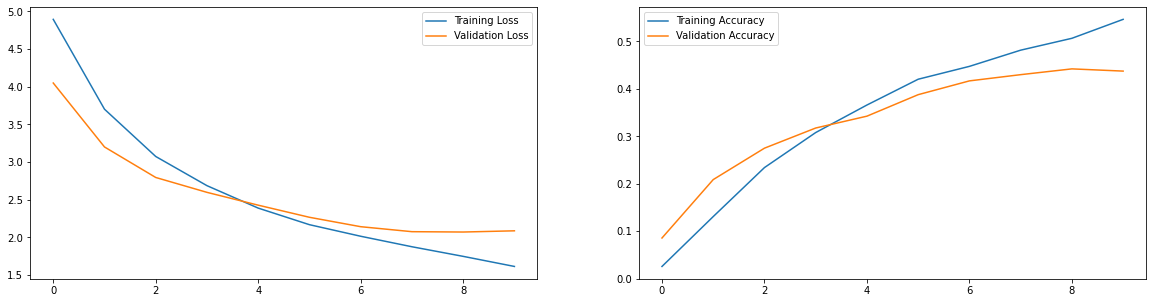

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

The training and test accuracy are in sync, we are able to reduce overfitting by using data augmentation



In [ ]:
#Save the model & weights for future reference
model_json = MobileNet_model.to_json()
with open("MobileNet_model.json", "w") as file:
  file.write(model_json)

MobileNet_model.save_weights("MobileNet_model_weights.h5")

Fitting the previous model for more epochs to train the network futher

In [ ]:
history = MobileNet_model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=10, validation_data=test_generator, validation_steps=len(test_generator))

Epoch 1/10
254/254 [==============================] - 546s 2s/step - loss: 1.4926 - accuracy: 0.5830 - val_loss: 2.1459 - val_accuracy: 0.4434
Epoch 2/10
254/254 [==============================] - 545s 2s/step - loss: 1.3892 - accuracy: 0.6052 - val_loss: 1.9554 - val_accuracy: 0.4759
Epoch 3/10
254/254 [==============================] - 548s 2s/step - loss: 1.3402 - accuracy: 0.6107 - val_loss: 2.0458 - val_accuracy: 0.4616
Epoch 4/10
254/254 [==============================] - 544s 2s/step - loss: 1.2610 - accuracy: 0.6336 - val_loss: 1.9632 - val_accuracy: 0.4866
Epoch 5/10
254/254 [==============================] - 534s 2s/step - loss: 1.2178 - accuracy: 0.6456 - val_loss: 1.9309 - val_accuracy: 0.5038
Epoch 6/10
254/254 [==============================] - 538s 2s/step - loss: 1.1400 - accuracy: 0.6614 - val_loss: 2.0151 - val_accuracy: 0.4844
Epoch 7/10
254/254 [==============================] - 538s 2s/step - loss: 1.0736 - accuracy: 0.6808 - val_loss: 2.1619 - val_accuracy: 0.4806

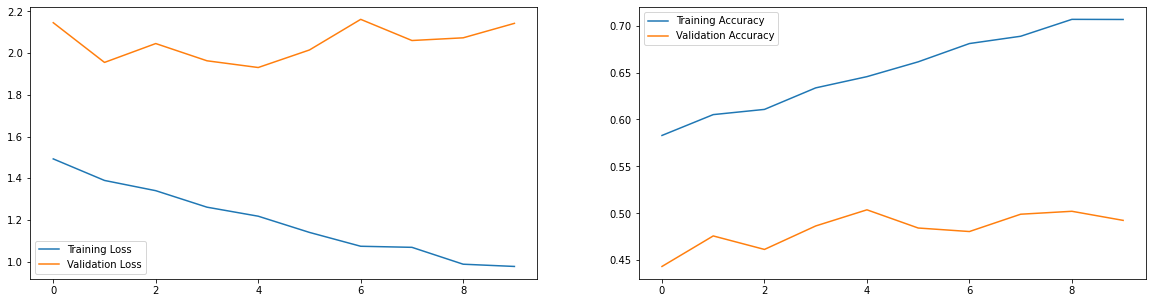

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

Training accuracy increased to 70% and test accuracy increased to 50%

There is no significant improvement in the test accuracy, the accuracy tends to saturate at 50%

### ResNet 50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(input_shape=(Image_Size, Image_Size, 3), weights='imagenet', include_top=False)

#Freeze all the layers
for layer in base_model.layers:
        layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
#x = Flatten()(x)
#x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(196, activation='softmax')(x)

ResNet_model = Model(inputs=base_model.input, outputs=x)

ResNet_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_____________________________

In [ ]:
ResNet_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = ResNet_model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=Epochs, validation_data=test_generator, validation_steps=len(test_generator), callbacks=[lr_schedule])

Epoch 1/10
255/255 [==============================] - 3531s 14s/step - loss: 5.8478 - accuracy: 0.0061 - val_loss: 5.5760 - val_accuracy: 0.0053


OSError: ignored

No learning is observed by freezing the feature extraction layers and training only the classifier layers

### EfficientNet

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0

base_model = EfficientNetB0(input_shape=(Image_Size, Image_Size, 3), weights='imagenet', include_top=False)

#Freeze all the layers
for layer in base_model.layers:
        layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
# x = Flatten()(x)
# x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
#x = Dense(512, activation='relu')(x)
x = Dense(196, activation='softmax')(x)

EffNet_model = Model(inputs=base_model.input, outputs=x)

EffNet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 224, 224, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_1[0][0]            
____________________________________________________________________________________________

In [ ]:
EffNet_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = EffNet_model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=Epochs, validation_data=test_generator, validation_steps=len(test_generator), callbacks=[lr_schedule])

Epoch 1/10
255/255 [==============================] - 4174s 16s/step - loss: 5.2805 - accuracy: 0.0058 - val_loss: 5.2798 - val_accuracy: 0.0056
Epoch 2/10
255/255 [==============================] - 982s 4s/step - loss: 5.2807 - accuracy: 0.0055 - val_loss: 5.2798 - val_accuracy: 0.0056
Epoch 3/10
255/255 [==============================] - 961s 4s/step - loss: 5.2805 - accuracy: 0.0055 - val_loss: 5.2798 - val_accuracy: 0.0056
Epoch 4/10
255/255 [==============================] - 983s 4s/step - loss: 5.2803 - accuracy: 0.0055 - val_loss: 5.2797 - val_accuracy: 0.0056
Epoch 5/10
255/255 [==============================] - 985s 4s/step - loss: 5.2804 - accuracy: 0.0055 - val_loss: 5.2795 - val_accuracy: 0.0056
Epoch 6/10
255/255 [==============================] - ETA: 0s - loss: 5.2803 - accuracy: 0.0056

KeyboardInterrupt: ignored

No learning is observed by freezing the feature extraction layers and training only the classifier layers

## Regression Model

In [ ]:
import csv
import cv2
from PIL import Image
from tensorflow.keras.applications.mobilenet import preprocess_input

In [ ]:
IMAGE_SIZE = 128 # Image sizes can vary (96, 128, 160, 192, 224) - MobileNetV2
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128

In [ ]:
data_train = pd.merge(train_images_path, car_annotations_train, how='inner',on='Image Name')

In [ ]:
data_train.head(5)

Image Name  ... Image class
0  04544.jpg  ...           1
1  08031.jpg  ...           1
2  00462.jpg  ...           1
3  02363.jpg  ...           1
4  00163.jpg  ...           1

[5 rows x 8 columns]

In [ ]:
print(data_train.shape)

(8103, 8)


In [ ]:
data_test = pd.merge(test_images_path, car_annotations_test, how='inner',on='Image Name')

In [ ]:
data_test.head(5)

Image Name  ... Image class
0  07393.jpg  ...           1
1  08035.jpg  ...           1
2  04088.jpg  ...           1
3  03073.jpg  ...           1
4  03193.jpg  ...           1

[5 rows x 8 columns]

In [ ]:
print(data_test.shape)

(8000, 8)


### Load the data

In [ ]:
y_train = np.zeros((int(data_train.shape[0]), 4))
X_train = np.zeros((int(data_train.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))

# Read image, its dimensions, BBox coords for train data

for index, row in data_train.iterrows():
  path = row.iloc[1]
  x0 = int(row.iloc[3])
  y0 = int(row.iloc[4])
  x1 = int(row.iloc[5])
  y1 = int(row.iloc[6])
  with Image.open(path) as image:
    image_width, image_height = image.size
    img = cv2.resize(np.array(image), dsize = (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation = cv2.INTER_CUBIC)
  try:
    img = img[:, :, :3]
  except:
    continue
  X_train[index] = preprocess_input(np.array(img, dtype = np.float32))

  y_train[index, 0] = x0 * IMAGE_SIZE / image_width                 # Normalize bounding box by image width
  y_train[index, 1] = y0 * IMAGE_SIZE / image_height                # Normalize bounding box by image height
  y_train[index, 2] = (x1 - x0) * IMAGE_SIZE / image_width          
  y_train[index, 3] = (y1 - y0) * IMAGE_SIZE / image_height  

In [ ]:
print(X_train.shape)
print(y_train.shape)

(8103, 128, 128, 3)
(8103, 4)


In [ ]:
y_test = np.zeros((int(data_test.shape[0]), 4))
X_test = np.zeros((int(data_test.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))

# Read image, its dimensions, BBox coords for test data

for index, row in data_test.iterrows():
  path = row.iloc[1]
  x0 = int(row.iloc[3])
  y0 = int(row.iloc[4])
  x1 = int(row.iloc[5])
  y1 = int(row.iloc[6])
  with Image.open(path) as image:
    image_width, image_height = image.size
    img = cv2.resize(np.array(image), dsize = (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation = cv2.INTER_CUBIC)
  try:
    img = img[:, :, :3]
  except:
    continue
  X_test[index] = preprocess_input(np.array(img, dtype = np.float32))

  y_test[index, 0] = x0 * IMAGE_SIZE / image_width                 # Normalize bounding box by image width
  y_test[index, 1] = y0 * IMAGE_SIZE / image_height                # Normalize bounding box by image height
  y_test[index, 2] = (x1 - x0) * IMAGE_SIZE / image_width          
  y_test[index, 3] = (y1 - y0) * IMAGE_SIZE / image_height  

In [ ]:
print(X_test.shape)
print(y_test.shape)

(8000, 128, 128, 3)
(8000, 4)


### MobileNet Model

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
ALPHA = 1.0 # Width hyper parameter for MobileNet (0.25, 0.5, 0.75, 1.0). Higher width means more accurate but slower

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA) # Load pre-trained mobilenet
    # Do not include classification (top) layer

    # to freeze layers, except the new top layer, of course, which will be added below
    for layer in model.layers:
        layer.trainable = trainable

    # Add new top layer which is a conv layer of the same size as the previous layer so that only 4 coords of BBox can be output
    x0 = model.layers[-1].output
    x1 = Conv2D(4, kernel_size=4, name="coords")(x0)
    # In the line above kernel size should be 3 for img size 96, 4 for img size 128, 5 for img size 160 etc.
    x2 = Reshape((4,))(x1) # These are the 4 predicted coordinates of one BBox

    return Model(inputs=model.input, outputs=x2)

In [ ]:
def IOU(y_true, y_pred):
    intersections = 0
    unions = 0
    # set the types so we are sure what type we are using

    gt = y_true
    pred = y_pred
    # Compute interection of predicted (pred) and ground truth (gt) bounding boxes
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height

    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

    # Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
      if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
        intersections += intersection[j]
        unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + tensorflow.keras.backend.epsilon()), 4)
    # This must match the type used in py_func
    iou = iou.astype(np.float32)
    return iou

In [ ]:
def IoU(y_true, y_pred):
    iou = tensorflow.py_function(IOU, [y_true, y_pred], Tout=tensorflow.float32)
    return iou

In [ ]:
model = create_model(False) # Arg is False, if you want to freeze lower layers for fast training (but low accuracy)
model.summary() # Print summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32)        0     

In [ ]:
# Compile the model
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[IoU]) # Regression loss is MSE

In [ ]:
# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_IoU', patience=5, min_delta=0.01)

In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, callbacks=[callback])

Epoch 1/10
254/254 [==============================] - 181s 704ms/step - loss: 179.2497 - IoU: 0.7502 - val_loss: 51.0928 - val_IoU: 0.8127
Epoch 2/10
254/254 [==============================] - 177s 698ms/step - loss: 37.2278 - IoU: 0.8396 - val_loss: 41.8752 - val_IoU: 0.8345
Epoch 3/10
254/254 [==============================] - 178s 703ms/step - loss: 27.4801 - IoU: 0.8597 - val_loss: 40.1241 - val_IoU: 0.8355
Epoch 4/10
254/254 [==============================] - 180s 712ms/step - loss: 22.1608 - IoU: 0.8729 - val_loss: 41.5335 - val_IoU: 0.8351
Epoch 5/10
254/254 [==============================] - 179s 707ms/step - loss: 18.1797 - IoU: 0.8844 - val_loss: 41.9111 - val_IoU: 0.8359
Epoch 6/10
254/254 [==============================] - 178s 702ms/step - loss: 15.4987 - IoU: 0.8913 - val_loss: 40.4914 - val_IoU: 0.8365


In [ ]:
#Final loss and accuracy

#model.evaluate(X_test, y_test)

In [ ]:
# Pick a random test image, run model, show image, and show predicted bounding box overlaid on the image
filename = data_test.iloc[1,1]

unscaled = cv2.imread(filename) # Original image for display

In [ ]:
image_height, image_width, _ = unscaled.shape
image = cv2.resize(unscaled, (IMAGE_HEIGHT, IMAGE_WIDTH)) # Rescaled image to run the network
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))
print ("Size of original input: ", image.shape)
print("-------------------------------")
print("Size of scaled input: ", feat_scaled.shape)

Size of original input:  (128, 128, 3)
-------------------------------
Size of scaled input:  (128, 128, 3)


In [ ]:
region = model.predict(x=np.array([feat_scaled]))[0]

In [ ]:
region

array([ 15.512946,  31.18037 , 101.214966,  83.81484 ], dtype=float32)

In [ ]:
x0 = int(region[0] * image_width / IMAGE_WIDTH) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_HEIGHT)

x1 = int((region[0] + region[2]) * image_width / IMAGE_WIDTH)
y1 = int((region[1] + region[3]) * image_height / IMAGE_HEIGHT)

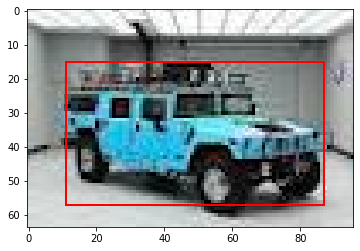

In [ ]:
import matplotlib.patches as patches

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [ ]:
# Define function to display predicted bounding box
def pred_bounding_box(image_indices):
  for im in image_indices:
    plt.figure(figsize=(15,12))
    filename = data_test.iloc[im, 1]
    unscaled = cv2.imread(filename)
    print(filename.split('/')[-2] + "/" + filename.split('/')[-1])
    image_height, image_width, _ = unscaled.shape
    image = cv2.resize(unscaled, (IMAGE_HEIGHT, IMAGE_WIDTH)) # Rescaled image to run the network
    feat_scaled = preprocess_input(np.array(image, dtype=np.float32))
    region = model.predict(x=np.array([feat_scaled]))[0]
    x0 = int(region[0] * image_width / IMAGE_WIDTH) # Scale the BBox
    y0 = int(region[1] * image_height / IMAGE_HEIGHT)
    x1 = int((region[0] + region[2]) * image_width / IMAGE_WIDTH)
    y1 = int((region[1] + region[3]) * image_height / IMAGE_HEIGHT)
    fig,ax = plt.subplots(1)
    ax.imshow(unscaled)
    rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.show()

Audi RS 4 Convertible 2008/07402.jpg


<Figure size 1080x864 with 0 Axes>

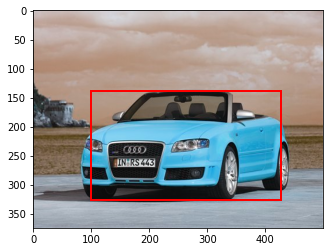

BMW 6 Series Convertible 2007/04485.jpg


<Figure size 1080x864 with 0 Axes>

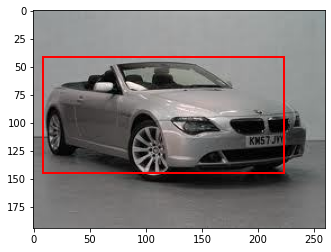

Mercedes-Benz S-Class Sedan 2012/00025.jpg


<Figure size 1080x864 with 0 Axes>

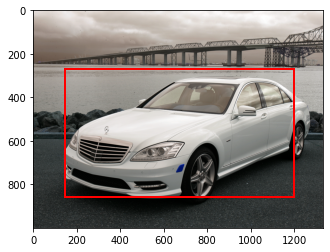

In [ ]:
image_indices = [472,1234,6740]
pred_bounding_box(image_indices)


In [ ]:
def plot_random_cars_with_bounding_box(car_makes, images_path, annotations):
  for car_make_idx in range(5):
      imageClass = random.randrange(0, len(car_makes_df))
      print(car_makes.iloc[imageClass].values[0])
      plt.figure(figsize=(15,12))
      for i in range(3):
        df = images_path[images_path["ImageClass"]==imageClass]
        if len(df) > 0:
          idx = random.randrange(0, len(df))
          plt.subplot(3, 3, i+1)
          plt.xticks([])
          plt.yticks([])
          plt.grid(False)
          img = imread(df.iloc[idx].FullPath)
          ann = annotations[annotations["Image Name"] == df.iloc[idx]['Image Name']]
          x1,y1,x2,y2 = ann['Bounding Box coordinates'].values[0], ann['Unnamed: 2'].values[0], ann['Unnamed: 3'].values[0], ann['Unnamed: 4'].values[0]
          cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2) # add rectangle to image
          plt.imshow(img)
      plt.show()